In [1]:
from astropy.io import fits 
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import proj_plane_pixel_scales, skycoord_to_pixel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier

from astrosceni.stars_filter import StarsFilter
from astrosceni.contour import Contour
from astrosceni.image import Image

filter = StarsFilter()
cont = Contour()
NB = Image()

# #Opens file and saves data to hdu
# hdu = fits.open("data/rim_Ha_wcs.fits")[0]
# #Obtains header information here for testing
# wcs = WCS(hdu.header)

NB.load("data/rim_Ha_wcs.fits")
NB.cropPixels(x_end=-30, y_start=30)

hdu = NB.getImageData(original = False)
wcs = NB.getWCS()

#Define the corners of the image
corners = [
    (0, 0),                # Bottom-left
    (hdu.shape[1], 0),            # Bottom-right
    (0, hdu.shape[0]),           # Top-left
    (hdu.shape[1], hdu.shape[0])        # Top-right
]

#Decide the Ra and Dec range of the image
raCorners, decCorners = wcs.pixel_to_world_values(*zip(*corners))
print("Min Ra = ", min(raCorners))
print("Max Ra = ", max(raCorners))
print("Min Dec = ", min(decCorners))
print("Max Dec = ", max(decCorners))

Min Ra =  276.39433790036
Max Ra =  280.29178764983146
Min Dec =  -14.744255449818068
Max Dec =  -12.091854019101142


In [2]:
#Testing the full range of the iamge
filter.set_mag_limit(1, None)
filter.set_region(min(raCorners), max(raCorners), min(decCorners), max(decCorners))
filter.set_visible_stars(NB)

#Obtain the shortened list of stars from the catalogue and their corresponding x and y pixels
filteredStars = filter.get_visible_stars()

In [3]:
print(filteredStars)
print(filteredStars.shape)

#Vmag is apparent magnitudes (magnitude in johnson)
#Plx is the parallax, used to derive distance to star (miliarcseconds)

         HIP        RAhms        DEdms   Vmag      RAICRS     DEICRS  \
90471  90552  18 28 36.68  -12 59 50.8   8.34  277.152825 -12.997439   
90479  90560  18 28 45.18  -14 11 21.6   9.16  277.188237 -14.189326   
90491  90572  18 28 53.51  -12 57 36.6   8.20  277.222977 -12.960158   
90514  90595  18 29 11.85  -14 33 56.9   4.67  277.299383 -14.565805   
90532  90613  18 29 23.88  -13 35 54.2   8.45  277.349486 -13.598380   
90580  90661  18 29 55.21  -12 23 22.0   9.19  277.480051 -12.389439   
90618  90701  18 30 19.30  -12 35 28.5   8.88  277.580423 -12.591252   
90701  90784  18 31 17.66  -14 06 50.3   8.75  277.823597 -14.113970   
90708  90791  18 31 19.75  -13 06 29.4   9.88  277.832282 -13.108170   
90715  90798  18 31 23.05  -12 20 16.7   9.48  277.846054 -12.337972   
90918  91001  18 33 50.80  -14 25 32.8   7.92  278.461671 -14.425770   
90920  91003  18 33 53.11  -12 15 46.3   9.54  278.471284 -12.262870   
90954  91037  18 34 15.76  -13 03 53.4   8.24  278.565680 -13.06

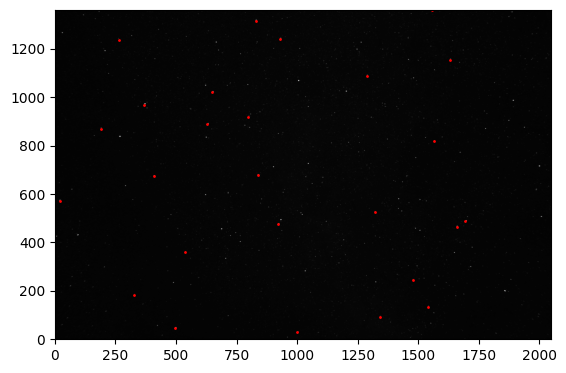

In [4]:
#Plot showing stars imaged onto image
plt.imshow(hdu.data, origin='lower', cmap = 'gray')
plt.scatter(filteredStars['x_pixels'], filteredStars['y_pixels'], s=1, color = 'red')
plt.show()

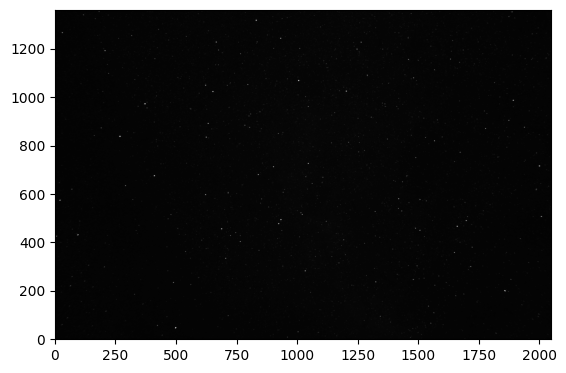

In [5]:
#plot showing default image
plt.imshow(hdu.data, origin='lower', cmap='gray')
plt.show()

In [ ]:
print(filteredStars.columns)

In [ ]:
print(filter.get_abs_mag_limit())

In [ ]:
print(hdu[200, 200])


In [ ]:
NB = Image()
NB.load("data/rim_Ha_wcs.fits")
hdu = NB.original_data
wcs = NB.original_wcs
print(hdu)
print(wcs)